# Loading Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv("/Users/abdul/Downloads/Kaggle_competition_datatset/train.csv")
train_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
test_df = pd.read_csv("/Users/abdul/Downloads/Kaggle_competition_datatset/test.csv")
test_df.head(3)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1


# Cleaning Data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [6]:
len(train_df)


517754

In [7]:
duplicate_count = len(train_df) - len(train_df.drop_duplicates())
duplicate_count

0

In [8]:
train_df.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [9]:
train_df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849975,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [10]:
train_df.head(3)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30


In [11]:
train_df['num_reported_accidents'].head(3)

0    1
1    0
2    2
Name: num_reported_accidents, dtype: int64

In [12]:
print(train_df.select_dtypes(include=['number']).columns)


Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents',
       'accident_risk'],
      dtype='object')


In [13]:
train_df['num_lanes'] = train_df['num_lanes'].astype(float)
train_df

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2.0,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4.0,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4.0,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4.0,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1.0,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,highway,4.0,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4.0,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4.0,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3.0,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51


In [14]:
# df = df.drop(columns = 'id')
train_df.head(3)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2.0,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4.0,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4.0,0.63,70,dim,clear,False,True,morning,True,False,2,0.30


# Finding the best Scaler

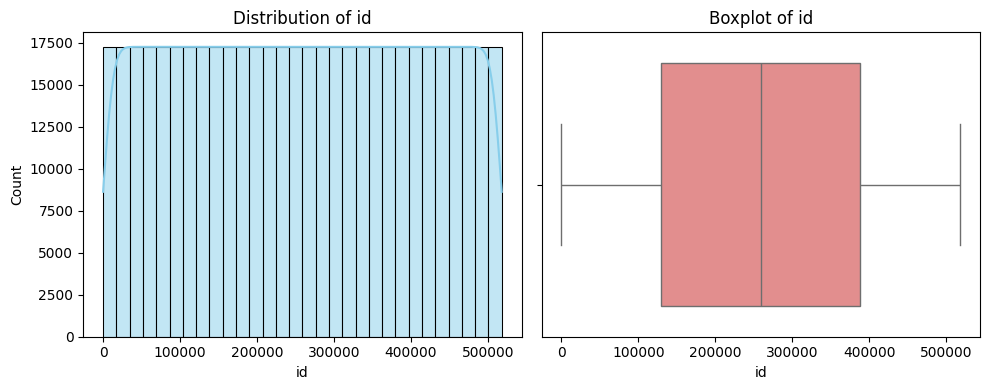

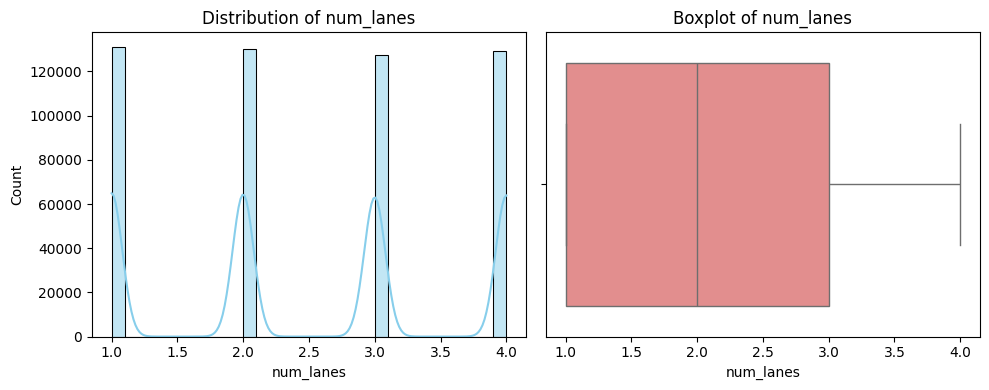

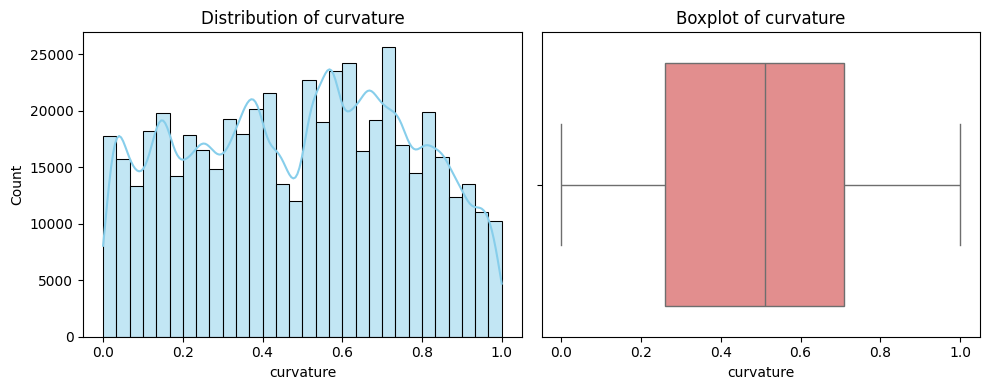

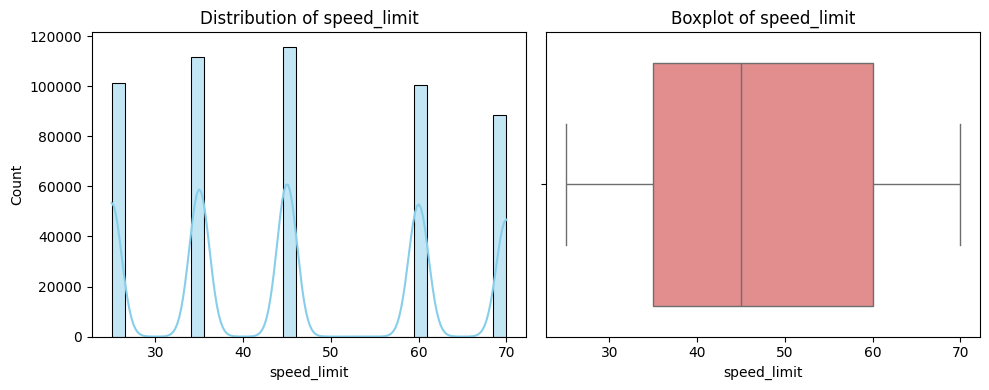

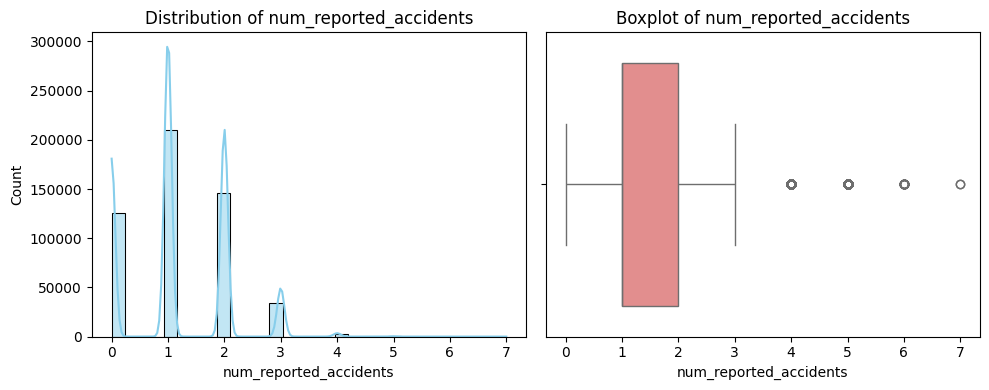

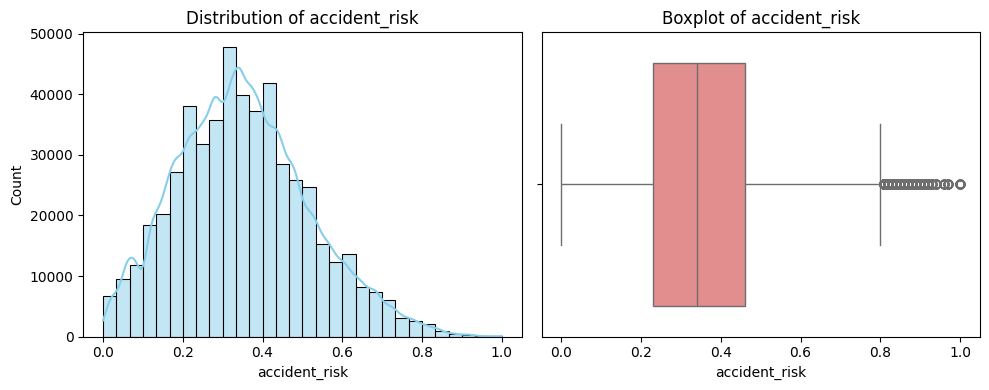

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# selecting numeric columns only
numeric_cols = train_df.select_dtypes(include=['number']).columns

# loop through each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


# Feature Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale_train = ['curvature', 'speed_limit', 'num_reported_accidents', 'num_lanes', 'accident_risk']

scaler = MinMaxScaler()

# Fit and transform only selected columns
train_df[cols_to_scale_train] = scaler.fit_transform(train_df[cols_to_scale_train])

# Transform test data using the same scaler
cols_to_scale_test = ['curvature', 'speed_limit', 'num_reported_accidents', 'num_lanes']
test_df[cols_to_scale_test] = scaler.fit_transform(test_df[cols_to_scale_test])

train_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,0.333333,0.06,0.222222,daylight,rainy,False,True,afternoon,False,True,0.142857,0.13
1,1,urban,1.000000,0.99,0.222222,daylight,clear,True,False,evening,True,True,0.000000,0.35
2,2,rural,1.000000,0.63,1.000000,dim,clear,False,True,morning,True,False,0.285714,0.30
3,3,highway,1.000000,0.07,0.222222,dim,rainy,True,True,morning,False,False,0.142857,0.21
4,4,rural,0.000000,0.58,0.777778,daylight,foggy,False,False,evening,True,False,0.142857,0.56


In [17]:
test_df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents
count,172585.000000,172585.000000,172585.000000,172585.000000,172585.000000
mean,604046.000000,0.498015,0.487263,0.468950,0.169437
std,49821.142441,0.373049,0.272343,0.350824,0.128166
min,517754.000000,0.000000,0.000000,0.000000,0.000000
25%,560900.000000,0.000000,0.260000,0.222222,0.142857
50%,604046.000000,0.333333,0.510000,0.444444,0.142857
75%,647192.000000,0.666667,0.710000,0.777778,0.285714
max,690338.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
train_df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,0.497170,0.488719,0.469168,0.169710,0.352377
std,149462.849975,0.373478,0.272563,0.350856,0.127994,0.166417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129438.250000,0.000000,0.260000,0.222222,0.142857,0.230000
50%,258876.500000,0.333333,0.510000,0.444444,0.142857,0.340000
75%,388314.750000,0.666667,0.710000,0.777778,0.285714,0.460000
max,517753.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Encoding Data

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

# Fitting encoder on train_data
encoded_df_train = ohe.fit(train_df[['road_type', 'lighting', 'weather','time_of_day']])
encoded_df_train

# Fitting encoder on test_data
encoded_df_test = ohe.fit(test_df[['road_type', 'lighting', 'weather','time_of_day']])
encoded_df_test


OneHotEncoder(sparse_output=False)

In [20]:
# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current columns of train_df
train_df[ohe.get_feature_names_out()] = ohe.transform(train_df[['road_type', 'lighting', 'weather', 'time_of_day']])

# Transform the current columns of test_df
test_df[ohe.get_feature_names_out()] = ohe.transform(test_df[['road_type', 'lighting', 'weather', 'time_of_day']])

# Drop the columns which have been encoded of train_df
new_train_df = train_df.drop(columns=["road_type", "lighting", "weather", "weather", "time_of_day"])

# Drop the columns which have been encoded of test_df
new_test_df = test_df.drop(columns=["road_type", "lighting", "weather", "weather", "time_of_day"])

new_train_df.head(3)

The column names for the encoded values are ['road_type_highway' 'road_type_rural' 'road_type_urban'
 'lighting_daylight' 'lighting_dim' 'lighting_night' 'weather_clear'
 'weather_foggy' 'weather_rainy' 'time_of_day_afternoon'
 'time_of_day_evening' 'time_of_day_morning']


,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,0,0.333333,0.06,0.222222,False,True,False,True,0.142857,0.13,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,1.000000,0.99,0.222222,True,False,True,True,0.000000,0.35,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,1.000000,0.63,1.000000,False,True,True,False,0.285714,0.30,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [21]:
test_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,517754,highway,0.333333,0.34,0.444444,night,clear,True,True,afternoon,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,517755,urban,0.666667,0.04,0.444444,dim,foggy,True,False,afternoon,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,517756,urban,0.333333,0.59,0.222222,dim,clear,True,False,afternoon,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,517757,rural,1.000000,0.95,0.222222,daylight,rainy,False,False,afternoon,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,517758,highway,0.333333,0.86,0.222222,daylight,clear,True,False,evening,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Label encoding for Binary Features

In [22]:
from sklearn.preprocessing import LabelEncoder

lable_encoder = LabelEncoder()
cols = ['road_signs_present', 'public_road', 'holiday', 'school_season']

for col in cols:
    new_train_df[col] = lable_encoder.fit_transform(new_train_df[col])
    new_test_df[col] = lable_encoder.fit_transform(new_test_df[col])
new_train_df.head(3)

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,0,0.333333,0.06,0.222222,0,1,0,1,0.142857,0.13,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,1.000000,0.99,0.222222,1,0,1,1,0.000000,0.35,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,1.000000,0.63,1.000000,0,1,1,0,0.285714,0.30,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [23]:
new_test_df.head(3)

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_highway,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,517754,0.333333,0.34,0.444444,1,1,1,1,0.142857,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,517755,0.666667,0.04,0.444444,1,0,1,0,0.000000,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,517756,0.333333,0.59,0.222222,1,0,1,1,0.142857,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [24]:
y = new_train_df['accident_risk']
y.describe()

count    517754.000000
mean          0.352377
std           0.166417
min           0.000000
25%           0.230000
50%           0.340000
75%           0.460000
max           1.000000
Name: accident_risk, dtype: float64

In [25]:
new_train_df['accident_risk_category'] = pd.cut(
                                new_train_df['accident_risk'],
                                bins=[0, 0.2, 0.6, 1.0],
                                labels=['very unlikely', 'medium risk', 'very likely'],
                                include_lowest=True
)

new_train_df[['accident_risk', 'accident_risk_category']].head(10)


,accident_risk,accident_risk_category
0,0.13,very unlikely
1,0.35,medium risk
2,0.30,medium risk
3,0.21,medium risk
4,0.56,medium risk
5,0.61,very likely
6,0.20,very unlikely
7,0.16,very unlikely
8,0.18,very unlikely
9,0.15,very unlikely


In [26]:
new_train_df.head()

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,...,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,accident_risk_category
0,0,0.333333,0.06,0.222222,0,1,0,1,0.142857,0.13,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,very unlikely
1,1,1.000000,0.99,0.222222,1,0,1,1,0.000000,0.35,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,medium risk
2,2,1.000000,0.63,1.000000,0,1,1,0,0.285714,0.30,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,medium risk
3,3,1.000000,0.07,0.222222,1,1,0,0,0.142857,0.21,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,medium risk
4,4,0.000000,0.58,0.777778,0,0,1,0,0.142857,0.56,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,medium risk


# Visualisation and correlation

In [27]:
from matplotlib import colormaps
# list(colormaps)

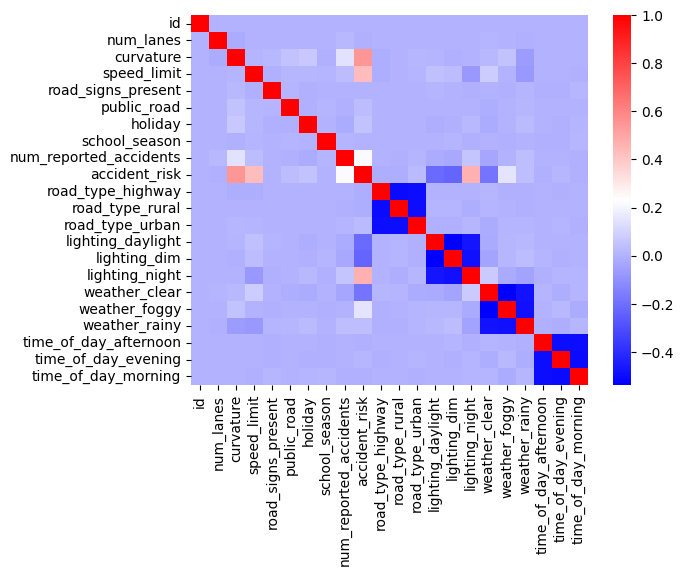

In [28]:
import seaborn as sns

# Heatmap of pairwise correlations
correlation_matrix = new_train_df.select_dtypes('number').corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [29]:
# Convert the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Rename the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']# Remove self-correlations (always 1.0 and not useful)

# Compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation']) # ignoring the sign of correlation number

# Show the most correlated pairs of feature
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']]
corr_df = corr_df.sort_values(by="absolute_correlation", ascending=False).reset_index().drop(columns = 'index').head(21)

In [30]:

corr_df


,feature_1,feature_2,correlation,absolute_correlation
0,curvature,accident_risk,0.543946,0.543946
1,accident_risk,curvature,0.543946,0.543946
2,lighting_dim,lighting_daylight,-0.537072,0.537072
3,lighting_daylight,lighting_dim,-0.537072,0.537072
4,weather_clear,weather_foggy,-0.534673,0.534673
5,weather_foggy,weather_clear,-0.534673,0.534673
6,road_type_highway,road_type_rural,-0.502658,0.502658
7,road_type_rural,road_type_highway,-0.502658,0.502658
8,time_of_day_morning,time_of_day_evening,-0.502345,0.502345
9,time_of_day_evening,time_of_day_morning,-0.502345,0.502345


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression


X = new_train_df.drop(columns=["accident_risk", "accident_risk_category"])
y = new_train_df["accident_risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 6) # Each model faces the same data challenge, so the comparison is fair.

baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y_train) # Calculate value for strategy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-1.6411121521731076e-05

# Scoring Model

In [32]:
model = LinearRegression()
model = model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8043167224027871

In [33]:
y_pred = model.predict(X_test)
y_pred.mean()

0.35262655373297846

In [34]:
y_train.shape

(362427,)

In [35]:
y_test.shape

(155327,)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print('RMSE =', round(rmse, 4))
print('MAE =', round(mae, 4))

RMSE = 0.0735
MAE = 0.0584


# Predicting Final results

In [37]:
model

LinearRegression()

In [38]:
y_train.head(3)

319265    0.17
36686     0.28
454338    0.61
Name: accident_risk, dtype: float64

In [39]:
X_train.head(3)

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_highway,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
319265,319265,0.666667,0.43,0.0,0,0,0,0,0.142857,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
36686,36686,0.666667,0.03,1.0,1,0,0,1,0.142857,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
454338,454338,0.000000,0.52,1.0,0,0,0,1,0.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
new_test_df['predicted_accident_risk'] = model.predict(new_test_df)

new_test_df.head(3)

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_highway,...,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,predicted_accident_risk
0,517754,0.333333,0.34,0.444444,1,1,1,1,0.142857,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.365110
1,517755,0.666667,0.04,0.444444,1,0,1,0,0.000000,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.157248
2,517756,0.333333,0.59,0.222222,1,0,1,1,0.142857,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.208353


In [46]:
accident_risk_predictions = new_test_df.to_csv("accident_risk_predictions.csv", index=False)
print("✅ File saved successfully as 'accident_risk_predictions.csv'")


✅ File saved successfully as 'accident_risk_predictions.csv'


In [42]:
test_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,517754,highway,0.333333,0.34,0.444444,night,clear,True,True,afternoon,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,517755,urban,0.666667,0.04,0.444444,dim,foggy,True,False,afternoon,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,517756,urban,0.333333,0.59,0.222222,dim,clear,True,False,afternoon,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,517757,rural,1.000000,0.95,0.222222,daylight,rainy,False,False,afternoon,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,517758,highway,0.333333,0.86,0.222222,daylight,clear,True,False,evening,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [43]:
submission = new_test_df[["id", "predicted_accident_risk"]]
submission.head(5)

,id,predicted_accident_risk
0,517754,0.365110
1,517755,0.157248
2,517756,0.208353
3,517757,0.435728
4,517758,0.328201


In [44]:
submission.to_csv("submission.csv", index=False)

In [45]:
import joblib

joblib.dump(model, "accident_model.pkl")

print("✅ Model saved successfully as 'accident_model.pkl'")


✅ Model saved successfully as 'accident_model.pkl'


![Thank you](https://media.tenor.com/XR8yJd7XQ2MAAAAi/panda-thank-you.gif)

**Thank you for reading! 🐼**
